# Capstone: Bitcoin: Time Series Forecasting Using Machine Learning

## 3.2 Modeling - Facebook Prophet
---

Facebook Prophet is used for forecasting time series data and it uses an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Let's see if it does better than the SARIMA and SARIMAX models in dealing with seasonality and volatility.

## Imports
---

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

from sklearn.metrics import mean_squared_error, mean_absolute_error

import _pickle as pickle

from fbprophet import Prophet

### Loading in the Data

In [2]:
with open("curr_bitcoin.pickle",'rb') as fp:
    ts = pickle.load(fp)

### Formatting the data for Facebook Prophet

In [3]:
# Resetting the index back so Dates are no longer indexed
ts.reset_index(inplace=True)

# Renaming the columns for use in FB prophet
ts.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
ts.drop(columns=['High', 'Low', 'Open'], inplace=True)
ts.tail()

,ds,y
3772,2020-11-13,16311.513323
3773,2020-11-14,16075.452734
3774,2020-11-15,15962.098952
3775,2020-11-16,16709.612284
3776,2020-11-17,17667.381593


In [4]:
ts.shape

(3777, 2)

#### Plotting

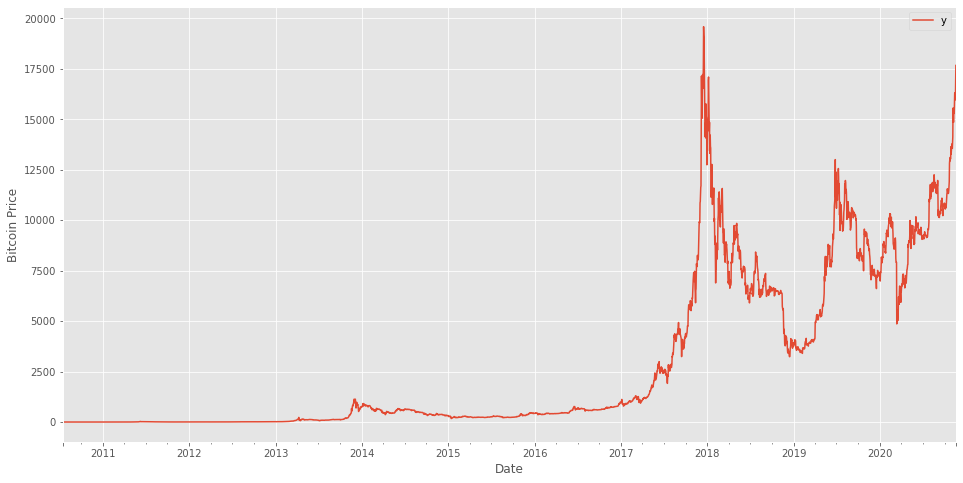

In [5]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = ts.set_index('ds').plot(figsize=(16,8))
ax.set_ylabel('Bitcoin Price')
ax.set_xlabel('Date')

plt.show()

### Modeling

In [6]:
# Setting up modeling
# Added seasonality layers for monthly and halving periods

In [7]:
# Fitting and training
mod = Prophet(interval_width=0.95, yearly_seasonality=True, 
               weekly_seasonality=True)
mod.add_seasonality(name='monthly', period=30.5, fourier_order=7, 
                    prior_scale=1)
mod.add_seasonality(name='halving', period=1460, fourier_order=40,
                   prior_scale=1)
mod.fit(ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
forecast = mod.predict(ts)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,halving,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3772,2020-11-13,13515.920876,11773.710905,14837.985039,13515.920876,13515.920876,-216.840532,-216.840532,-216.840532,34457.211962,...,-0.732817,-0.732817,-0.732817,-34675.050351,-34675.050351,-34675.050351,0.0,0.0,0.0,13299.080344
3773,2020-11-14,13528.688261,11715.293068,14731.543881,13528.688261,13528.688261,-338.267015,-338.267015,-338.267015,35004.074208,...,4.665189,4.665189,4.665189,-35339.314175,-35339.314175,-35339.314175,0.0,0.0,0.0,13190.421246
3774,2020-11-15,13541.455646,11529.462082,14599.498642,13541.455646,13541.455646,-485.283575,-485.283575,-485.283575,35479.792897,...,-4.941645,-4.941645,-4.941645,-35943.170901,-35943.170901,-35943.170901,0.0,0.0,0.0,13056.172071
3775,2020-11-16,13554.223031,11468.995718,14480.535545,13554.223031,13554.223031,-598.758154,-598.758154,-598.758154,35882.840541,...,8.217778,8.217778,8.217778,-36483.117510,-36483.117510,-36483.117510,0.0,0.0,0.0,12955.464877
3776,2020-11-17,13566.990416,11441.686848,14306.985485,13566.990416,13566.990416,-726.261905,-726.261905,-726.261905,36212.807774,...,4.178629,4.178629,4.178629,-36956.633099,-36956.633099,-36956.633099,0.0,0.0,0.0,12840.728511


In [9]:
test_mae = mean_absolute_error(ts['y'], forecast['yhat'])
test_rmse = np.sqrt(mean_squared_error(ts['y'], forecast['yhat']))

print(f" Prophet's MAE : {test_mae}")
print(f"Prophet's RMSE : {test_rmse}")

 Prophet's MAE : 511.61342022082806
Prophet's RMSE : 767.9404684855838


### Plotting Values
* Blue line = forecasted values
* Black dots = observed values
* Uncertainty intervals = blue shaded region

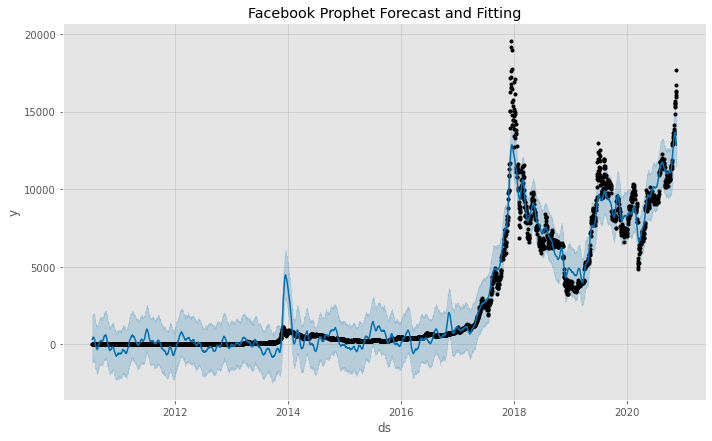

In [10]:
mod.plot(forecast, uncertainty=True)
plt.title('Facebook Prophet Forecast and Fitting')
plt.savefig('fb_fc_fit.png')
plt.show()

#### Creating future dates to forecast

#### Forecasting future values

In [11]:
# Setting up predictions to be made
future = mod.make_future_dataframe(periods=364, freq='D')
print(future.shape)
future.tail()

(4141, 1)


,ds
4136,2021-11-12
4137,2021-11-13
4138,2021-11-14
4139,2021-11-15
4140,2021-11-16


In [12]:
# Making predictions
forecast = mod.predict(future)
print(forecast.shape)
forecast.head()

(4141, 25)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,halving,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-17,-659.314678,-1229.244482,1804.437116,-659.314678,-659.314678,978.694715,978.694715,978.694715,-29908.293823,...,4.665189,4.665189,4.665189,30908.391966,30908.391966,30908.391966,0.0,0.0,0.0,319.380037
1,2010-07-18,-659.054671,-1199.358797,1646.000957,-659.054671,-659.054671,986.416157,986.416157,986.416157,-29393.794681,...,-4.941645,-4.941645,-4.941645,30430.033708,30430.033708,30430.033708,0.0,0.0,0.0,327.361486
2,2010-07-19,-658.794663,-1106.771924,1900.764228,-658.794663,-658.794663,1027.118581,1027.118581,1027.118581,-28872.862394,...,8.217778,8.217778,8.217778,29940.680529,29940.680529,29940.680529,0.0,0.0,0.0,368.323919
3,2010-07-20,-658.534655,-1038.706776,1969.007688,-658.534655,-658.534655,1054.876943,1054.876943,1054.876943,-28344.472512,...,4.178629,4.178629,4.178629,29438.614589,29438.614589,29438.614589,0.0,0.0,0.0,396.342288
4,2010-07-21,-658.274647,-1075.990576,1927.388958,-658.274647,-658.274647,1074.404072,1074.404072,1074.404072,-27807.637853,...,-2.899523,-2.899523,-2.899523,28922.268995,28922.268995,28922.268995,0.0,0.0,0.0,416.129425


### Plotting Values
* Blue line = forecasted values
* Black dots = observed values
* Uncertainty intervals = blue shaded region

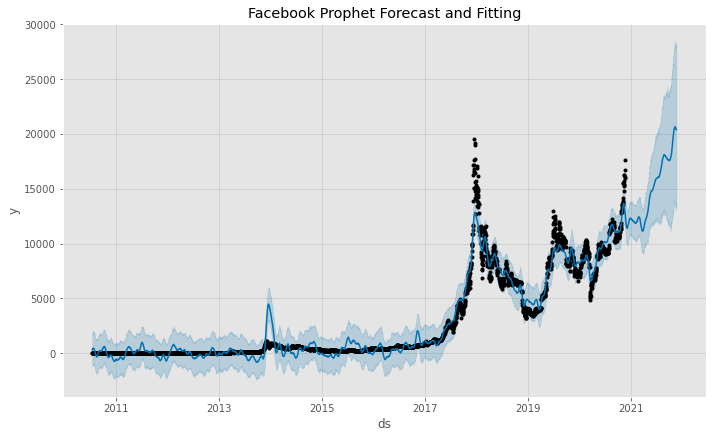

In [13]:
mod.plot(forecast, uncertainty=True)
plt.title('Facebook Prophet Forecast and Fitting')
plt.savefig('fb_fc_fit.png')
plt.show()

#### Graph above zoomed in

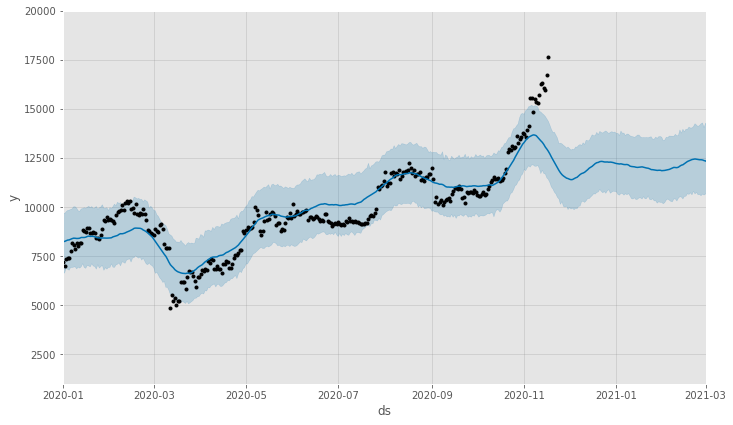

In [14]:
mod.plot(forecast, uncertainty=True)

plt.xlim(['2020-01-01', '2021-03-01'])
plt.ylim([1000, 20000])
plt.savefig('fb_zoom.png')
plt.show()

#### Plotted components of the forecasts

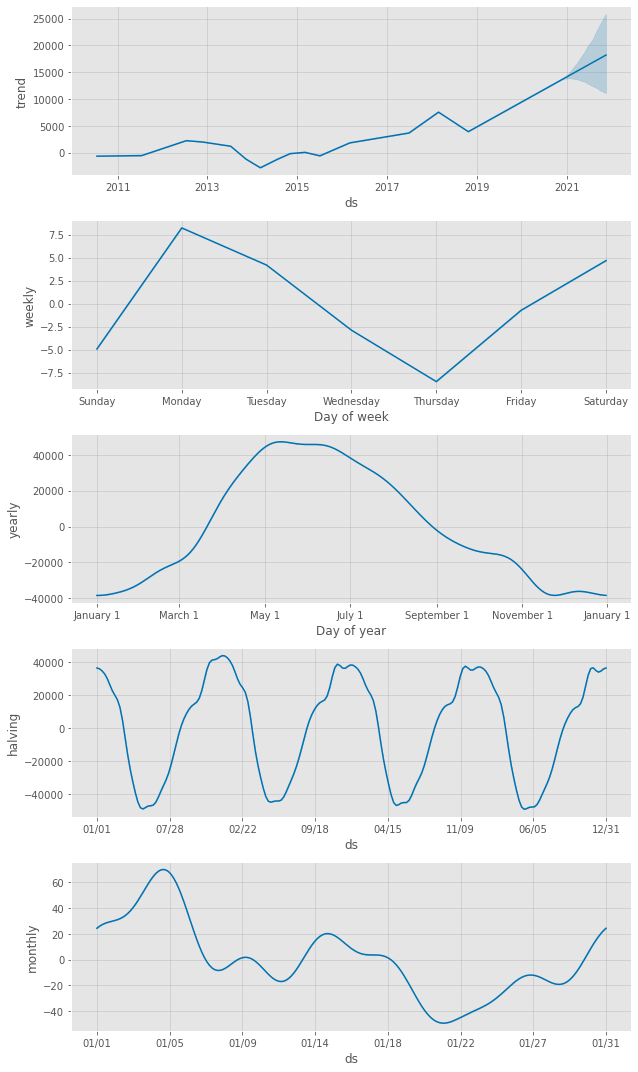

In [15]:
mod.plot_components(forecast)
plt.show()

#### Plotted changepoints

In [16]:
from fbprophet.plot import add_changepoints_to_plot

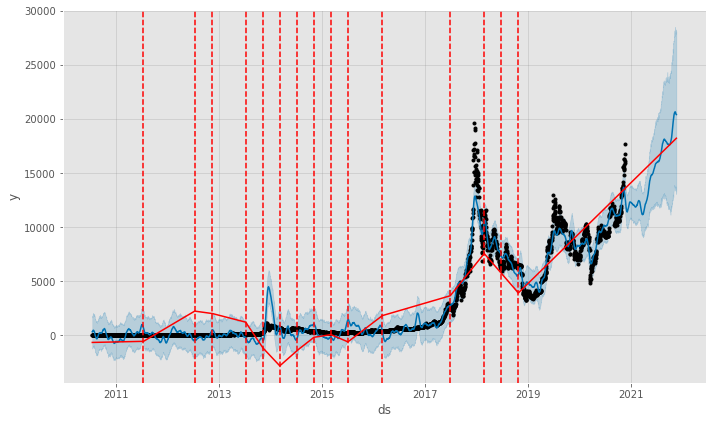

In [17]:
fig = mod.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), mod, forecast)

## Adding exogenous variables

### Loading in the Data

In [18]:
with open("exog_bitcoin.pickle",'rb') as fp:
    ts = pickle.load(fp)

In [19]:
ts.tail()

,market_mvrv_more_155,ma128,ma14,ma200,ma25,ma40,ma60,ma9,ma90,addresses_accumulation_balance,...,entities_active_count,indicators_net_unrealized_profit_loss,addresses_receiving_from_exchanges_count,supply_current,transactions_transfers_to_exchanges_count,indicators_sopr_less_155,month,week,day,day_of_week
t,,,,,,,,,,,,,,,,,,,,,
2020-11-18 02:00:00,1.800986,7.724089e+22,7.259935e+22,7.321730e+22,7.789492e+22,8.029164e+22,4.058201e+22,7.287512e+22,7.892102e+22,2.361896e+06,...,178521.0,0.60368,17005.0,18546393.75,44501.0,0.997702,11,47,18,2
2020-11-18 03:00:00,1.800986,7.724089e+22,7.259935e+22,7.321730e+22,7.789492e+22,8.029164e+22,4.058201e+22,7.287512e+22,7.892102e+22,2.361896e+06,...,178521.0,0.60368,17005.0,18546393.75,44501.0,0.997702,11,47,18,2
2020-11-18 04:00:00,1.800986,7.724089e+22,7.259935e+22,7.321730e+22,7.789492e+22,8.029164e+22,4.058201e+22,7.287512e+22,7.892102e+22,2.361896e+06,...,178521.0,0.60368,17005.0,18546393.75,44501.0,0.997702,11,47,18,2
2020-11-18 21:40:00,1.800986,7.724089e+22,7.259935e+22,7.321730e+22,7.789492e+22,8.029164e+22,4.058201e+22,7.287512e+22,7.892102e+22,2.361896e+06,...,178521.0,0.60368,17005.0,18546393.75,44501.0,0.997702,11,47,18,2
2020-11-18 21:50:00,1.800986,7.724089e+22,7.259935e+22,7.321730e+22,7.789492e+22,8.029164e+22,4.058201e+22,7.287512e+22,7.892102e+22,2.361896e+06,...,178521.0,0.60368,17005.0,18546393.75,44501.0,0.997702,11,47,18,2


In [20]:
ts.reset_index(inplace=True)

In [21]:
# Renaming the columns for use in FB prophet
ts.rename(columns={'t': 'ds', 'Close': 'y'}, inplace=True)
ts.drop(columns=['High', 'Low', 'Open'], inplace=True)

In [22]:
# Resetting the index back so Dates are no longer indexed
ts.reset_index(drop=True, inplace=True)
ts.head()

,ds,market_mvrv_more_155,ma128,ma14,ma200,ma25,ma40,ma60,ma9,ma90,...,entities_active_count,indicators_net_unrealized_profit_loss,addresses_receiving_from_exchanges_count,supply_current,transactions_transfers_to_exchanges_count,indicators_sopr_less_155,month,week,day,day_of_week
0,2010-01-01,4.849526,4.313379e+09,4.463299e+09,4.306751e+09,4.389233e+09,4.353883e+09,2.169753e+09,4.556816e+09,4.321152e+09,...,4.0,0.421756,0.0,1631150.0,1.0,1.325994,1,53,1,4
1,2010-01-02,4.849526,4.319516e+09,4.519409e+09,4.310678e+09,4.420655e+09,4.373522e+09,2.176318e+09,4.644100e+09,4.329881e+09,...,0.0,0.421756,0.0,1637400.0,1.0,1.325994,1,53,2,5
2,2010-01-03,4.849526,4.325653e+09,4.575520e+09,4.314606e+09,4.452077e+09,4.393161e+09,2.182929e+09,4.731383e+09,4.338609e+09,...,0.0,0.421756,0.0,1646700.0,1.0,1.325994,1,53,3,6
3,2010-01-04,4.849526,4.331790e+09,4.631631e+09,4.318534e+09,4.483499e+09,4.412799e+09,2.189539e+09,4.818666e+09,4.347337e+09,...,5.0,0.421756,0.0,1655750.0,1.0,1.325994,1,1,4,0
4,2010-01-05,4.849526,4.337927e+09,4.687741e+09,4.322461e+09,4.514921e+09,4.432438e+09,2.196157e+09,4.905949e+09,4.356065e+09,...,0.0,0.421756,0.0,1665650.0,1.0,1.325994,1,1,5,1


In [23]:
exogenous_features = [i for i in ts.columns if i not in 'ydsCloseHighOpenLow']

In [24]:
split_date = "2020-01-01"
train_filt = ts['ds'] < split_date
test_filt = ts['ds'] >= split_date

train = ts[train_filt]
test = ts[test_filt]

In [25]:
print("train data shape :", train.shape)
print("test data shape :", test.shape)

train data shape : (86549, 106)
test data shape : (8057, 106)


In [26]:
model = Prophet()
for feature in exogenous_features:
    model.add_regressor(feature)

model.fit(train[["ds", "y"] + exogenous_features])

forecast = model.predict(test[["ds"] + exogenous_features])

In [27]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,addresses_accumulation_balance,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8052,2020-11-18 02:00:00,4158.131106,17645.991118,17701.686052,4133.595120,4182.772641,13515.592352,13515.592352,13515.592352,-0.182623,...,-0.030162,-0.030162,-0.030162,0.408986,0.408986,0.408986,0.0,0.0,0.0,17673.723459
8053,2020-11-18 03:00:00,4158.167606,17905.453405,17962.255890,4133.629698,4182.811469,13775.351342,13775.351342,13775.351342,-0.182623,...,-0.029825,-0.029825,-0.029825,0.410385,0.410385,0.410385,0.0,0.0,0.0,17933.518948
8054,2020-11-18 04:00:00,4158.204105,18387.832359,18443.885999,4133.664277,4182.850297,14255.900853,14255.900853,14255.900853,-0.182623,...,-0.029346,-0.029346,-0.029346,0.411795,0.411795,0.411795,0.0,0.0,0.0,18414.104958
8055,2020-11-18 21:40:00,4158.848929,18386.166419,18442.720988,4134.275164,4183.562711,14255.041147,14255.041147,14255.041147,-0.182623,...,-0.007109,-0.007109,-0.007109,0.438292,0.438292,0.438292,0.0,0.0,0.0,18413.890076
8056,2020-11-18 21:50:00,4158.855012,18385.551452,18442.300342,4134.280927,4183.569485,14255.048156,14255.048156,14255.048156,-0.182623,...,-0.006894,-0.006894,-0.006894,0.438556,0.438556,0.438556,0.0,0.0,0.0,18413.903169


### Plotting Values
* Blue line = forecasted values
* Black dots = observed values
* Uncertainty intervals = blue shaded region

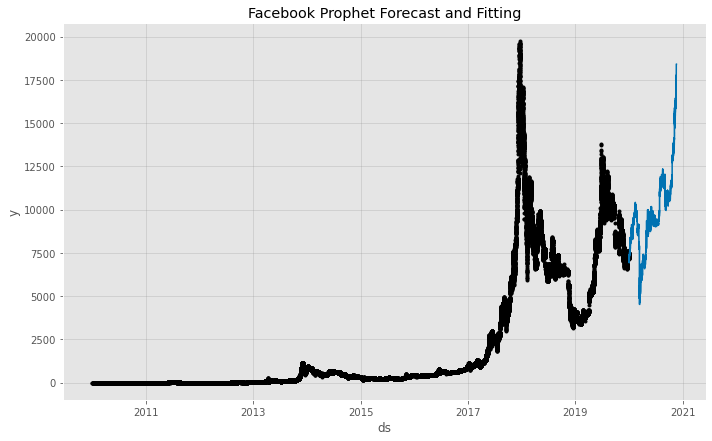

In [28]:
# Plot Our Predictions
model.plot(forecast, uncertainty=True)
plt.title('Facebook Prophet Forecast and Fitting');

#### Graph above zoomed in

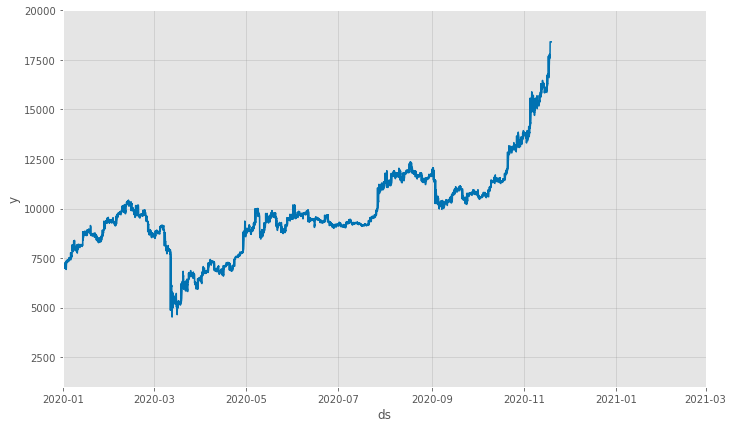

In [29]:
model.plot(forecast, uncertainty=True)

plt.xlim(['2020-01-01', '2021-03-01'])
plt.ylim([1000, 20000])
plt.savefig('fb_zoom.png')
plt.show()

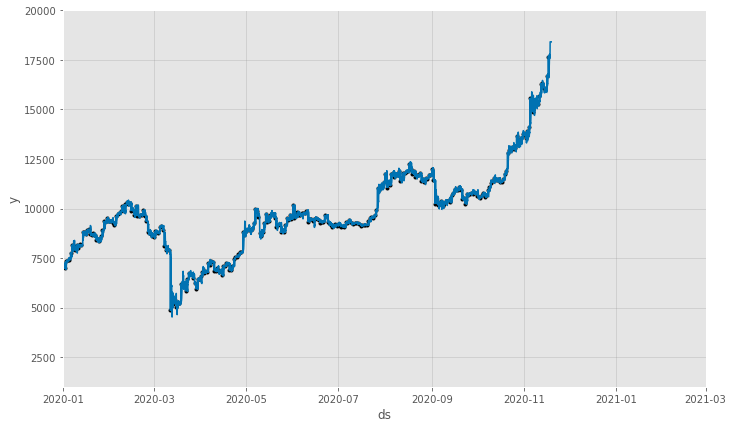

In [30]:
mod.plot(forecast, uncertainty=True)

plt.xlim(['2020-01-01', '2021-03-01'])
plt.ylim([1000, 20000])
plt.savefig('fb_zoom.png')
plt.show()

#### Plotted components of the forecasts

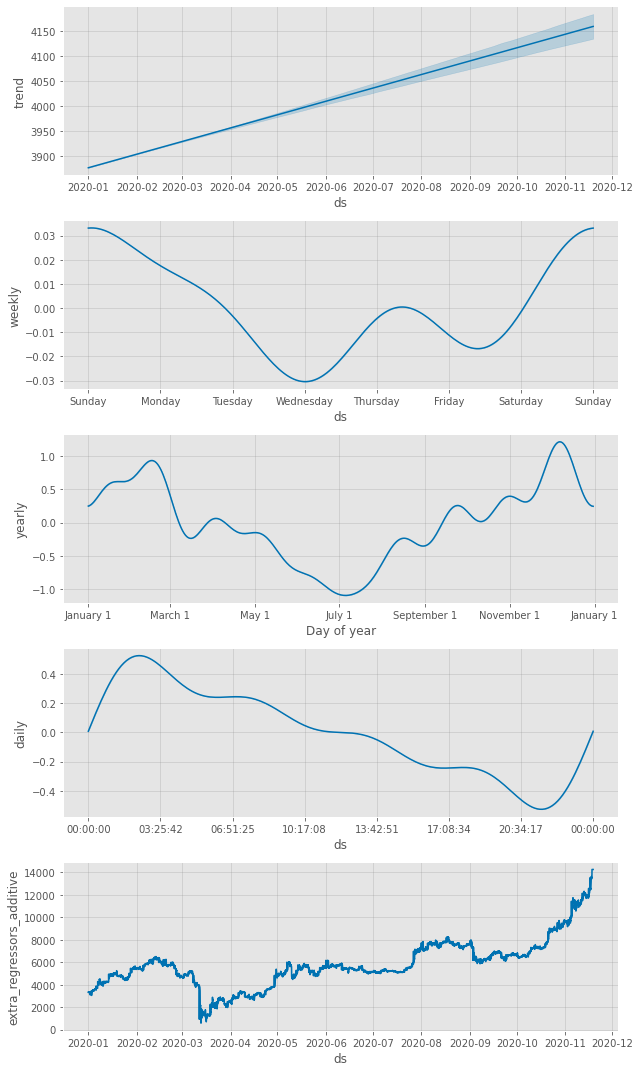

In [31]:
model.plot_components(forecast)
plt.show()

#### Plotted changepoints

In [32]:
from fbprophet.plot import add_changepoints_to_plot

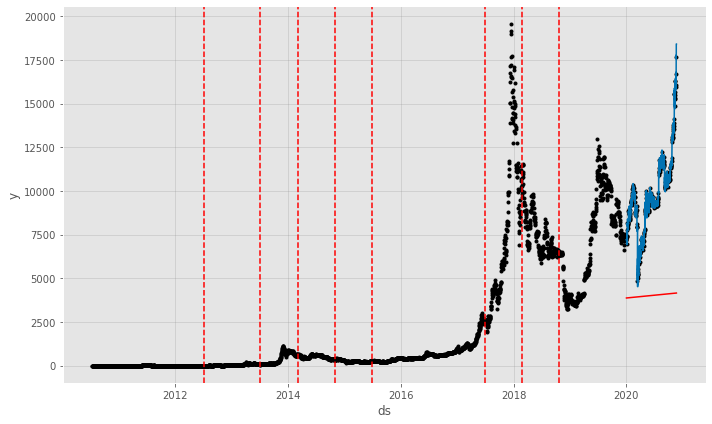

In [33]:
fig = mod.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), mod, forecast,threshold=1.5)

### Update Validation Data Pickle

In [34]:
with open("valid_ARIMAX_bitcoin.pickle",'rb') as fp:
    test = pickle.load(fp)

In [35]:
test["Forecast_Prophet"] = forecast.yhat.values

ValueError: Length of values (8057) does not match length of index (322)

In [ ]:
with open("valid_FBProphet_bitcoin.pickle", 'wb') as fp:
    pickle.dump(test, fp)

### Plotting our predictions against the test data

In [ ]:
test[["y", "Forecast_Prophet"]].plot(figsize=(14, 7));

### MAE and RMSE

In [ ]:
test_mae = mean_absolute_error(test['y'], test['Forecast_Prophet'])
test_rmse = np.sqrt(mean_squared_error(test['y'], test['Forecast_Prophet']))

print(f" Prophet's MAE : {test_mae}")
print(f"Prophet's RMSE : {test_rmse}")

Our best results so far!

In [ ]:
#Keeping only relevant columns
forecast_df = forecast[['ds','yhat','yhat_lower','yhat_upper' ]]
forecast_df

# Plotting the predicted values -> yhat
forecast_df.set_index('ds')['yhat'].plot()

In [ ]:
# Plotting both actual and the predicted values -> y and yhat
pd.concat([ts.set_index('ds')['y'],forecast_df.set_index('ds')['yhat']], axis=1).plot()  

test_fb = forecast_df[forecast_df['ds']>= "2020-01-02"]
df_concat = test_fb.merge(test,how='inner',on="ds")
df_concat.plot(x="ds", y=["y", "yhat"])

In [ ]:
# # Checking Deltas
deltas = model.params['delta'].mean(0)
deltas

# Plotting changepoints
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

# Checking model changepoints

list(zip(range(1,26),model.changepoints, deltas))

Relevant changepoint dates from the data.

In [ ]:
# # Checking Deltas
deltas = mod.params['delta'].mean(0)
deltas

# Plotting changepoints
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

# Checking model changepoints

list(zip(range(1,26),model.changepoints, deltas))

#### Creating future dates to forecast

#### Forecasting future values

In [ ]:
model = Prophet()
for feature in exogenous_features:
    model.add_regressor(feature)

model.fit(ts[["ds", "y"] + exogenous_features])

forecast = model.predict(ts[["ds"] + exogenous_features])
forecast.head()

In [ ]:
# Setting up predictions to be made
future = model.make_future_dataframe(periods=364, freq='D')
print(future.shape)
future.tail()

In [ ]:
future[exogenous_features] = 0

In [ ]:
# Making predictions
forecast = model.predict(future[['ds'] + exogenous_features])
print(forecast.shape)
forecast.head()

In [ ]:
mod.plot(forecast, uncertainty=True)
plt.title('Facebook Prophet Forecast and Fitting')
plt.savefig('fb_fc_fit.png')
plt.show()

### Update Validation Data Pickle

In [ ]:
with open("valid_ARIMAX_bitcoin.pickle",'rb') as fp:
    test = pickle.load(fp)

In [ ]:
test["Forecast_Prophet"] = forecast.yhat.values

In [ ]:
with open("valid_FBProphet_bitcoin.pickle", 'wb') as fp:
    pickle.dump(test, fp)